### Intro to Hugging Face

In [2]:
# Let's check the GPU - it should be a Tesla T4

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)
  if gpu_info.find('Tesla T4') >= 0:
    print("Success - Connected to a T4")
  else:
    print("NOT CONNECTED TO A T4")

Sat Nov  1 07:58:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

#### Login to HF.CO

In [1]:
from huggingface_hub import login
from google.colab import userdata


hf_token = userdata.get('HF_TOKEN')
login(hf_token, add_to_git_credential=True)

#### Lets try to use a simple Diffussion model

model_index.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

text_encoder_2/model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/5.14G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/4 [00:00<?, ?it/s]

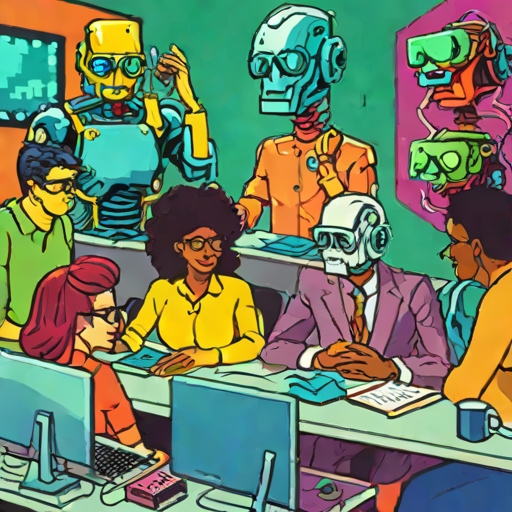

In [4]:
from IPython.display import display
from diffusers import AutoPipelineForText2Image
import torch

pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")
prompt = "A class of students learning AI engineering in a vibrant pop-art style"
image = pipe(prompt=prompt, num_inference_steps=4, guidance_scale=0.0).images[0]
display(image)

#### Lets look at pipeline in Hugging Face
Pipeline is high level api in Hugging face libraries to work with models. Pipeline provides some predefined defaults to work easily with models.

In [4]:
from transformers import pipeline

simple_sentiment_pipeline = pipeline("sentiment-analysis", device="cuda")
print("Result 1", simple_sentiment_pipeline("I'm super exited and this a lot"))
print("Result 1", simple_sentiment_pipeline("I should be super exited and this a lot"))

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


Result 1 [{'label': 'POSITIVE', 'score': 0.9746747016906738}]
Result 1 [{'label': 'NEGATIVE', 'score': 0.9260154366493225}]


#### Previously we did not specify model name, but we can specify model name and hugging face will use that model

In [7]:
simple_sentiment_pipeline2 = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment", device="cuda")
print("Result 1", simple_sentiment_pipeline2("I'm super exited and this a lot"))
print("Result 1", simple_sentiment_pipeline2("I should be super exited and this a lot"))

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda


Result 1 [{'label': '5 stars', 'score': 0.5803953409194946}]
Result 1 [{'label': '2 stars', 'score': 0.23052845895290375}]


#### Like sentiment analysis, there are other tasks which can be performed

In [8]:
# Named Entity Recognition
ner = pipeline(task="ner", device="cuda")
res = ner("I like learning AI Engineering from Ed Donner")

for entity in res:
  print(entity)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda


{'entity': 'I-ORG', 'score': np.float32(0.99848735), 'index': 4, 'word': 'AI', 'start': 16, 'end': 18}
{'entity': 'I-ORG', 'score': np.float32(0.9946826), 'index': 5, 'word': 'Engineering', 'start': 19, 'end': 30}
{'entity': 'I-PER', 'score': np.float32(0.9990252), 'index': 7, 'word': 'Ed', 'start': 36, 'end': 38}
{'entity': 'I-PER', 'score': np.float32(0.99852884), 'index': 8, 'word': 'Don', 'start': 39, 'end': 42}
{'entity': 'I-PER', 'score': np.float32(0.9828721), 'index': 9, 'word': '##ner', 'start': 42, 'end': 45}


In [9]:
# Question Answering with context
qna = pipeline(task="question-answering", device="cuda")
context = "Hello My name is Shakeel. I am an AI Engineer. I love coding. My favourite color is Green"
question = "What is Shakeel's favourite color"
qna(question=question, context=context)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda


{'score': 0.992161214351654, 'start': 84, 'end': 89, 'answer': 'Green'}

In [10]:
# Text Summarization
summarize = pipeline(task="summarization", device="cuda")
text = """The Hugging Face Hub is a platform with over 2M models,
500k datasets, and 1M demo apps (Spaces), all open source
and publicly available, in an online platform where people can easily collaborate
and build ML together. The Hub works as a central place where anyone can explore,
experiment, collaborate, and build technology with Machine Learning.
Are you ready to join the path towards open source Machine Learning?"""

summarize(text)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cuda
Your max_length is set to 142, but your input_length is only 97. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=48)


[{'summary_text': ' Hugging Face Hub is a platform with over 2M models, \xa0500k datasets, and 1M demo apps (Spaces) all open source . Hub works as a central place where anyone can explore, experiment, collaborate, and build technology with Machine Learning .'}]

In [12]:
# Translation
translate = pipeline(task="translation_en_to_fr", device="cuda")
translate("I like learning AI Engineering from Ed Donner")


No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda


[{'translation_text': "J'aime apprendre l'ingénierie AI de Ed Donner"}]

In [13]:
# Classification
classify = pipeline(task="zero-shot-classification", device="cuda")
buckets=["tech", "entertainment", "politics"]
text="Python's OpenAI SDK library is great and compatible with other tools"

classify(text, candidate_labels=buckets)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda


{'sequence': "Python's OpenAI SDK library is great and compatible with other tools",
 'labels': ['tech', 'entertainment', 'politics'],
 'scores': [0.9683186411857605, 0.02580844983458519, 0.005872959736734629]}

In [14]:
# Text Generation
generate = pipeline(task="text-generation", device="cuda")
generate("New York is a great place but")

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "New York is a great place but, in some ways, it is a place that is not. I don't mean as a journalist, a journalist, or a commentator, but I believe that the American people deserve an open, honest, and honest debate about this country's immigration policy.\n\nBut to ask you to support Donald Trump and his policies will be an incredible undertaking.\n\nIf you want to know what it is like to support and oppose Trump and his policies, I would invite you to watch that debate.\n\nI want to make sure that we take a moment to reflect, to understand, to talk about this economy and our immigration policies. I want to talk about what we must do to make sure we don't turn the country back. I want to talk about what we can do to make sure that we don't turn the country back. I want to talk about the issues that are at stake in this battle. And I want to talk about what is at stake in this fight.\n\nSo I want to make sure that we're in a position to make a difference."}]

In [16]:
# Audio Generation
from IPython.display import Audio

tts = pipeline(task="text-to-speech", device="cuda")
speech = tts("Hi, I am an Artificial Intelligence Bot. How can I help you?")

Audio(speech["audio"], rate=speech["sampling_rate"])

No model was supplied, defaulted to suno/bark-small and revision 1dbd7a1 (https://huggingface.co/suno/bark-small).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
